In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import svm

In [13]:
import warnings
# to ignore annoying python warnings
warnings.filterwarnings('ignore')

In [3]:
weights = np.load("weights.npy")
data_path = "../data/Iris.csv"
df = pd.read_csv(data_path,index_col="Id")

In [7]:
st_ont_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data = np.concatenate([data,np.ones((data.shape[0],1))], axis=1)
df['label'] = list(map( lambda x:st_ont_dict[x],df['Species'] ))

In [104]:
st_ont_dict_inv = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
preds = list(svm.predict(weights, data.T))
df['Preds'] = list(map( lambda x:st_ont_dict_inv[x],preds))

In [105]:
df[df['Preds']==df['Species']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label,Preds
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica,2,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica,2,Iris-virginica


In [109]:
df['acc'] = (df['Preds']==df['Species']).astype(int)

In [113]:
df.to_csv("../data/clean_preds.csv")

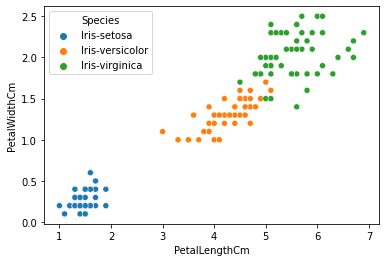

In [16]:
sns.scatterplot(df.PetalLengthCm, df.PetalWidthCm, hue=df.Species);

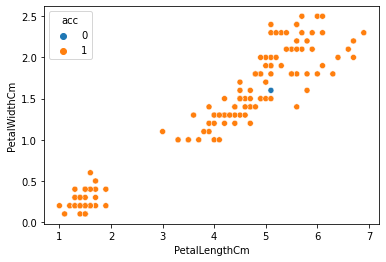

In [112]:
sns.scatterplot(df.PetalLengthCm, df.PetalWidthCm, hue=df.acc, palette=None);